## Connection of voltmeter on a circuit

OBJECTIVES

<ul>
    <li>To further learn how to use the ac/dc power source</li>
    <li>To learn the basics of how to properly connect meters in a circuit</li>
</ul>

<p>A volt is the unit of electrical potential. Voltage is measured by using a Voltmeter. Voltmeters have a high internal resistance and are always connected in parallel with a circuit or component such as a resistor. The usual way of connecting a voltmeter for measuring the potential difference across a component (R5)is as shown in Figure 1.1</p>

<h3>
    <u>Voltmeter Connected in parallel across load resistor</u>
</h3>

<p>
    Connect the circuit of fig 1.1 and let the instructor check your connections and certify it correct before switching power into your circuit.
</p>

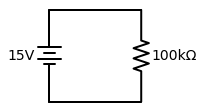

In [8]:
import schemdraw as schem
import schemdraw.elements as elm

d = schem.Drawing()

Line1 = d.add(elm.LINE, d='left')
d += elm.Battery().down().label('15V')
d += elm.LINE().right().length(3)
d += elm.Resistor().down().up().label(('100kΩ'), loc='bottom')
# d += elm.Line().right().length(3)
# d += elm.Line().right().length(3)
# d += elm.SourceControlledI().up().label(('$8i_Φ$'), loc='bottom')
# d += elm.Resistor().left().label('2Ω')
# d.push()
# d += elm.Resistor().down().label('10Ω').toy(Line1.end)
# d.pop()
# d += elm.Resistor().left().label('5Ω')
# d.push()
# d += elm.Resistor().down().label('20Ω')
# d.pop()
# d += elm.Resistor().left().label('2Ω')
# d += elm.SourceV().down().label('20V')
# d += elm.Ground().down()
d


<p>Note: Make sure that you strictly follow the procedure before switching on the power into your circuit</p>

<p>Procedure</p>
<ul>
    <li>Make sure the power supply is in the off position</li>
    <li>For those that were using analogue dc power supply unit, first connect (0-15v or 0-30v)d.c voltmeter or digital multimeter set on 20vdc range across the power supply unit temporarily to enable you set the voltage from the analogue dc power supply unit to the required voltage.</li>
    <li>
        Record the reading on the digital voltmeter connected across R5    
    </li>
    <li>Is there any difference between the source voltage and the voltmeter reading? If any, give your reasons for the differences.</li>
    
</ul>

In [22]:
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

import warnings
warnings.filterwarnings('ignore')

import ipywidgets as widgets
from IPython.display import display, clear_output

In [37]:
circuit = Circuit('Measuring voltage on a circuit')
circuit.V('input', 1, circuit.gnd, 15@u_V)
circuit.R(1, 2, circuit.gnd, 100@u_kΩ)

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.operating_point()

button_send = widgets.Button(
                description='Simulate Circuit',
                tooltip='Simulate',
                style={'description_width': 'initial'}
            )

output = widgets.Output()

def on_button_clicked(event):
    with output:
        clear_output()
        for node in analysis.nodes.values():
            print('Node {}: {:4.1f} V'.format(str(node), float(node)))
        for node in analysis.branches.values():
            print('Node {}: {:5.2f} A'.format(str(node), float(node)))

button_send.on_click(on_button_clicked)

vbox_result = widgets.VBox([button_send, output])

vbox_result
